In [40]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Very Quick Overview of AI:

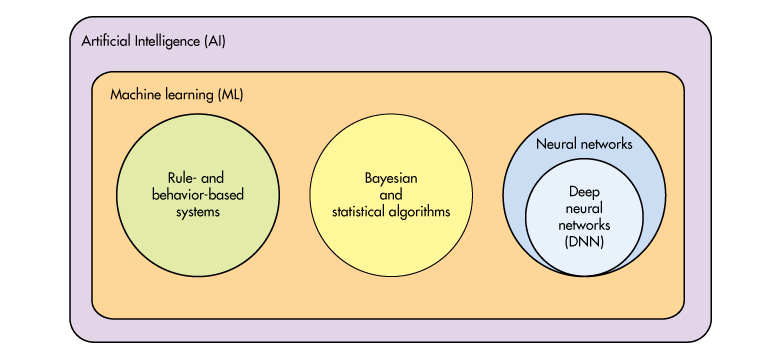

Artificial Neural Networks (ANN) is the field of study that attempts to model how our brians think in code.  It is the fasting growing field of AI, but is also one of the most mis-understood.  At the core of every Neural Network is the Perceptron, so understanding it in depth is essential to mastering ANNs.

### AI's Two Main Goals:

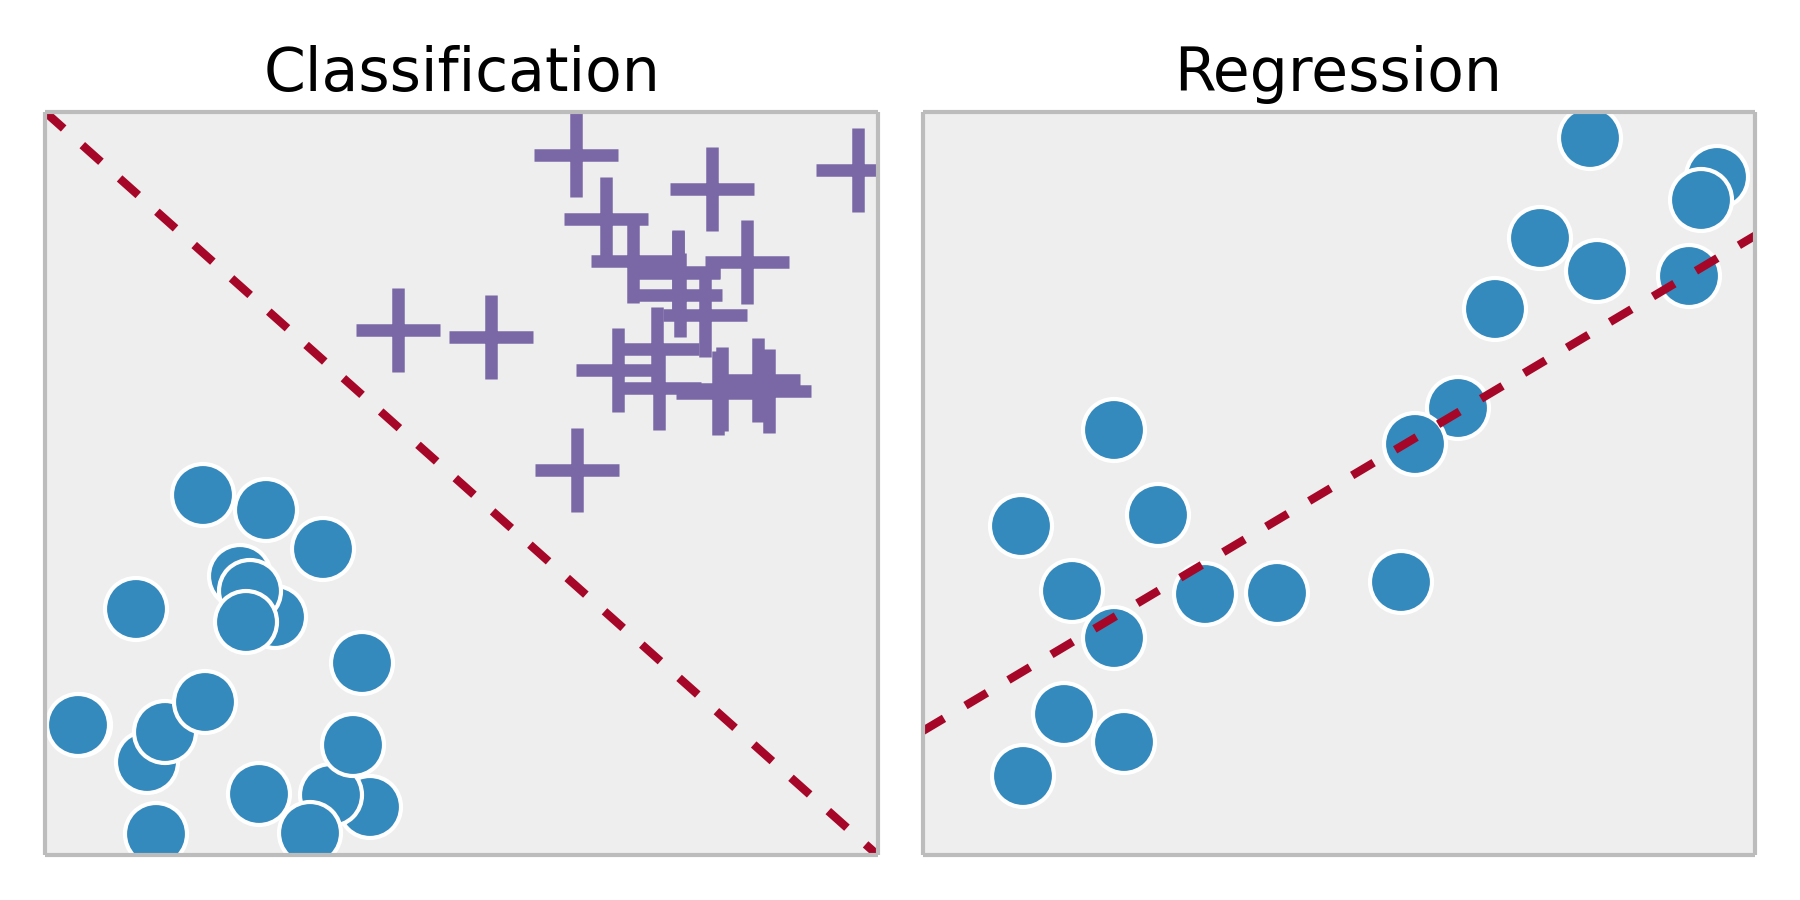

### Dataset

We will use the Iris dataset for our examples.  Which consists of 3 Iris flowers, 50 samples and 4 dimensions measured.

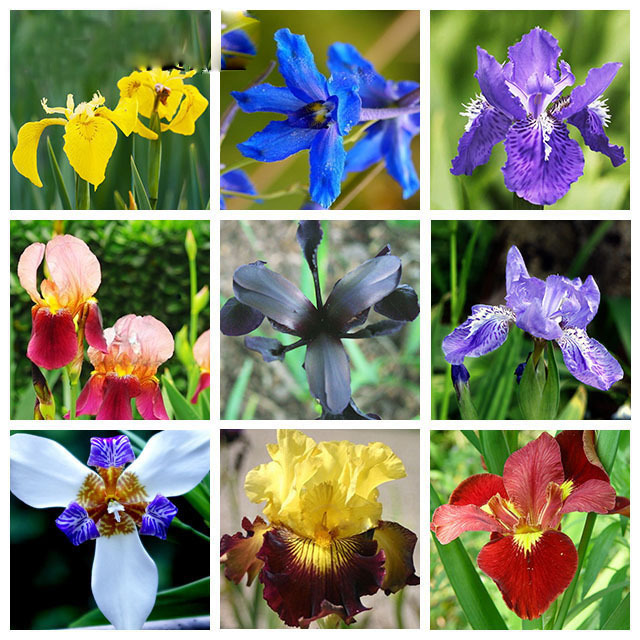

In [14]:
from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


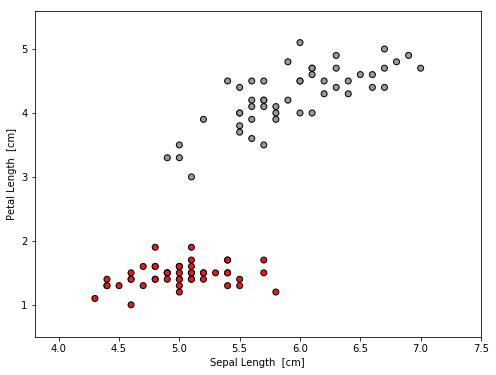

In [30]:
X = iris.data[:100, [0,2]]
y = iris.target[:100]

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal Length  [cm]')
plt.ylabel('Petal Length  [cm]')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Modeling the Brain

1943 Warren McCullock and Walter Pitts published first concept of a simplified brain cell.  They describe it as a simple logic gate with binary outputs.  Signals come in thorugh the Dendrites, and if there is enough accumulated signal that exceeds the neuron's threshold parameters it will output a signal through it's axon.

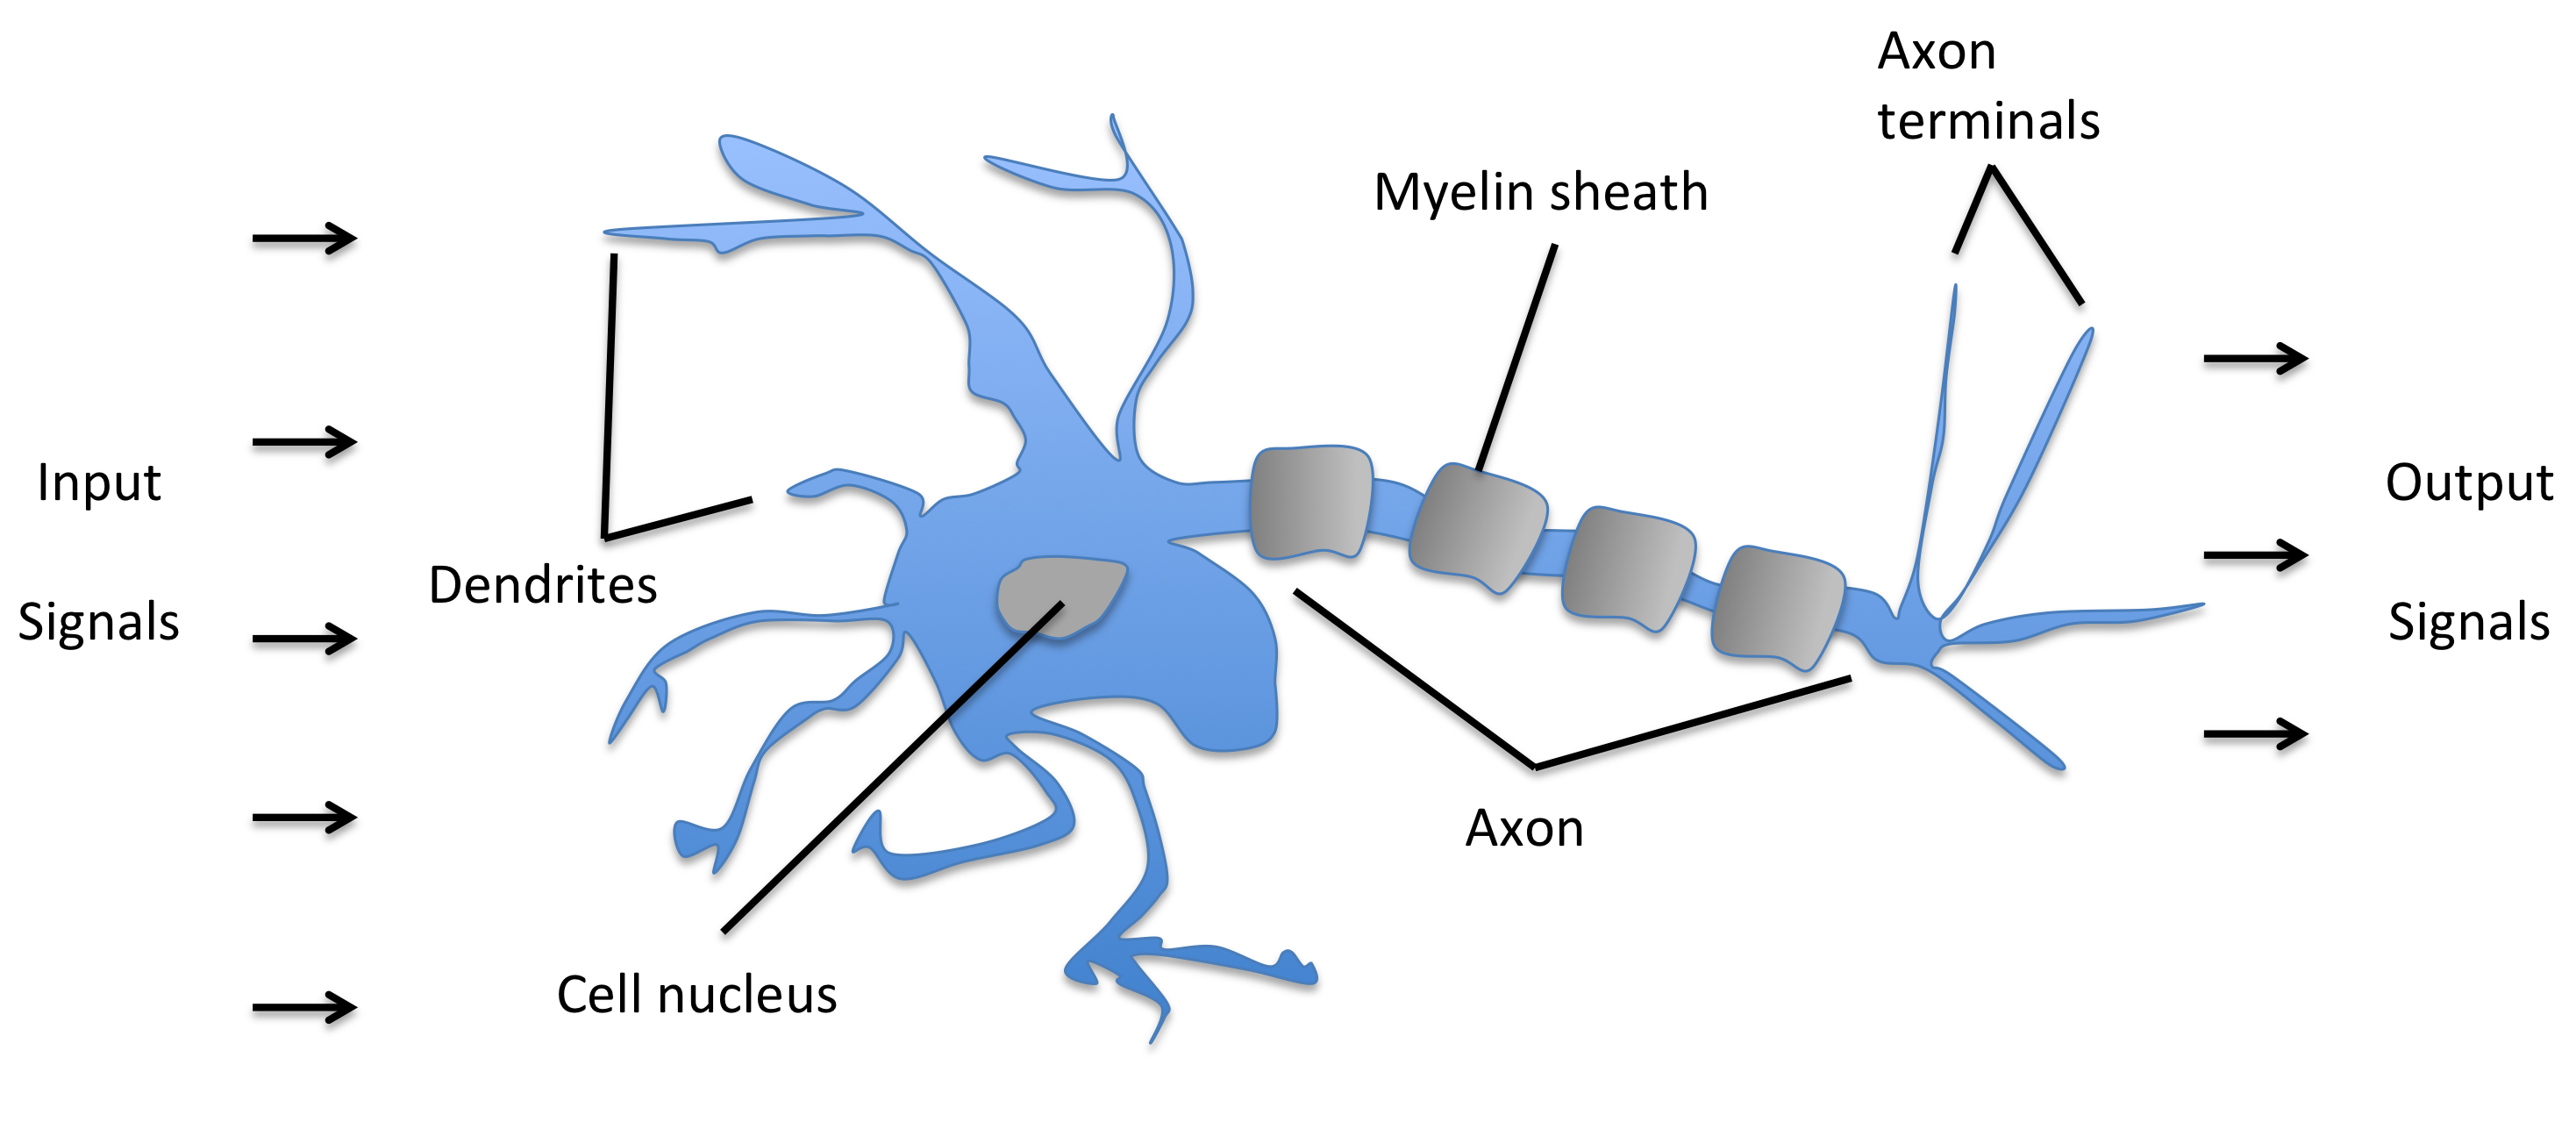

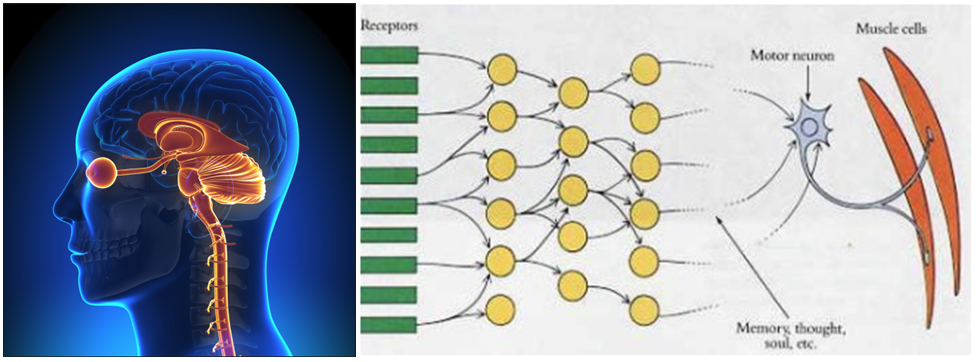

# The Perceptron Algorithm:
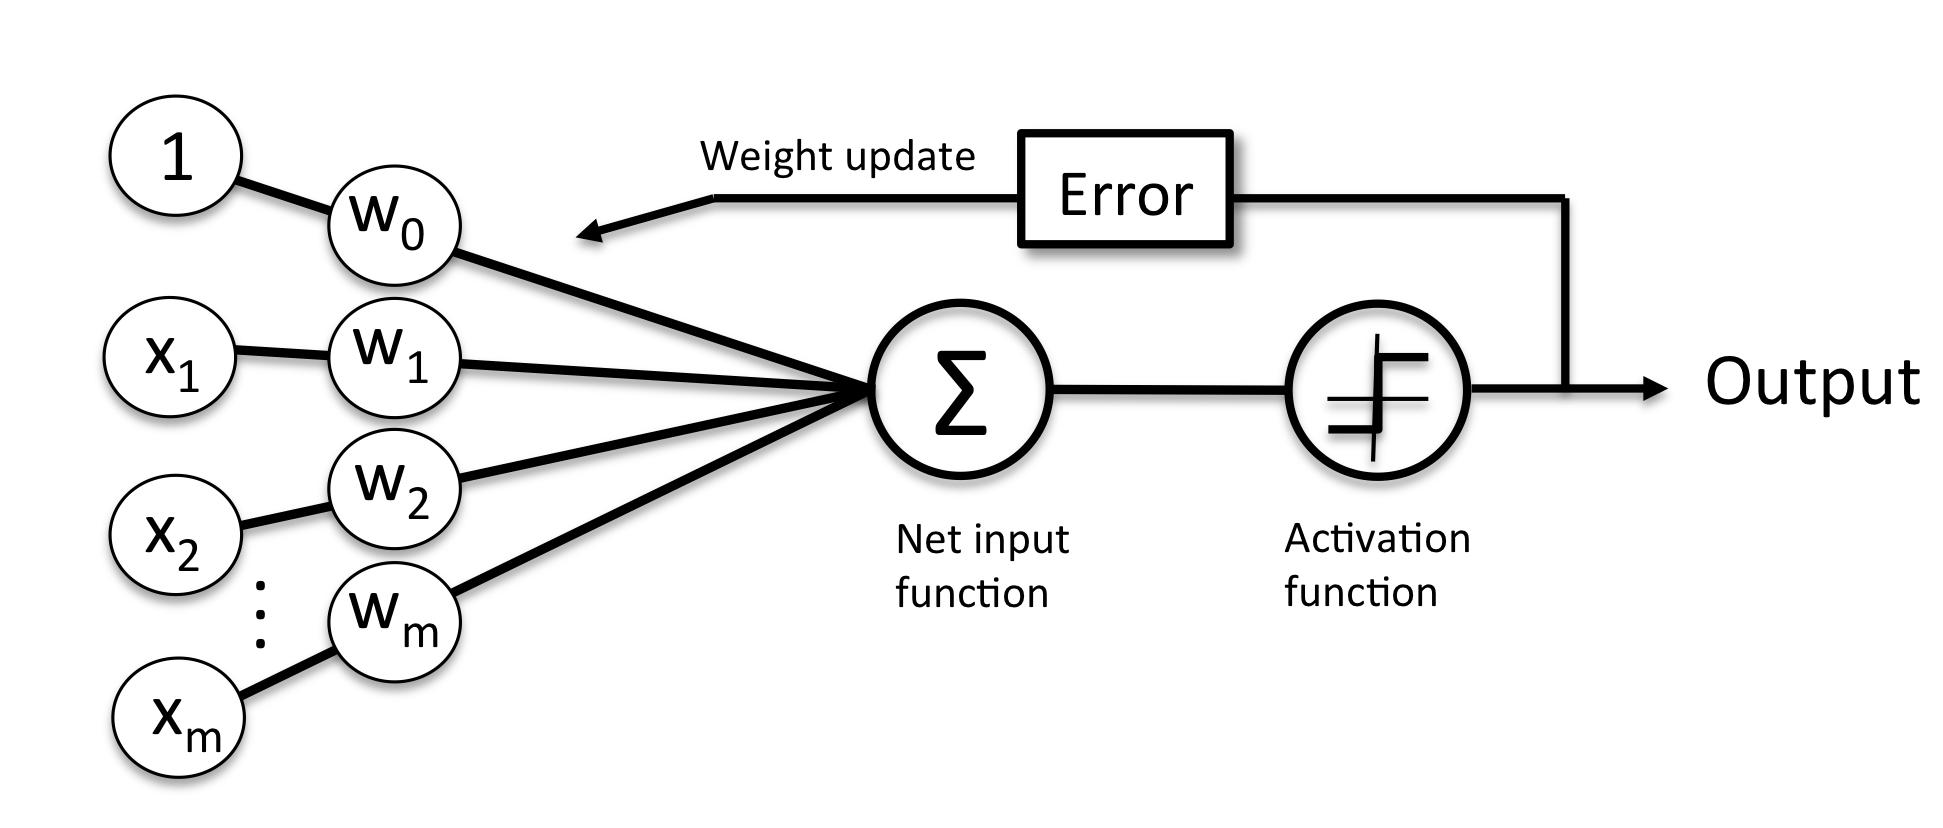



Frank Rosenblatt later published the first concept of the perceptron learning rule.  His algorithm would automatically learn the optimal weight coefficients to be multiplied by the inputs to determine if the neuron would fire or not.


Firing Basics:
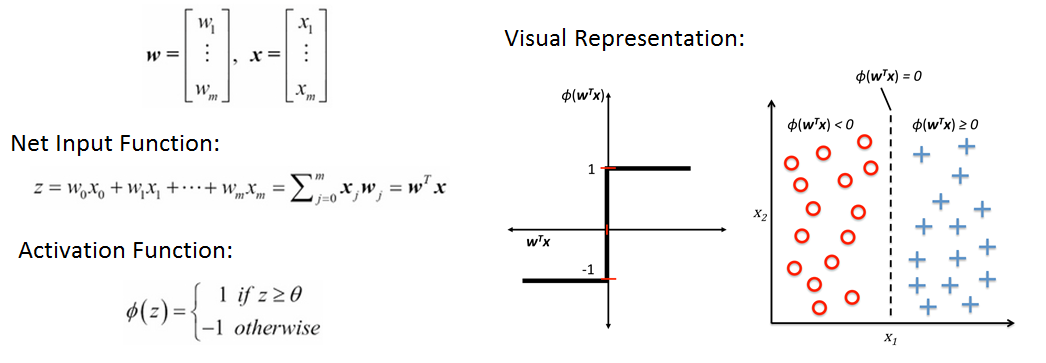



Maybe it is helpful to walk through the matrix-vector multiplication by hand. E.g.,
```
    wT          x                             z
              | 4 | 
| 1  4  5 | x | 2 | = | 1*4 + 4*2 + 5*3 | = | 27 |
              | 3 |
```    
Is 27 > threshold?  We don't know, we need to learn it.  We do this by adding a bias term $w_0x_0$.  We can then set the threshold to $\theta$ = 0

```
    wT              x                                      z
                   | 1 |    
                   | 4 | 
| -30  1  4  5 | x | 2 | = | -30*1 + 1*4 + 4*2 + 5*3 | = | -3 |
                   | 3 |
```  
No, it isn't above the threshold.



So now we know how a neuron fires, how do we determine the weights for a neuron?

Learning Mechanism proposed by F. Rosenblatt had 2 steps:
1. Initial all the weights to 0 or a small random number
2. Computer the output value, and update weight based on error.
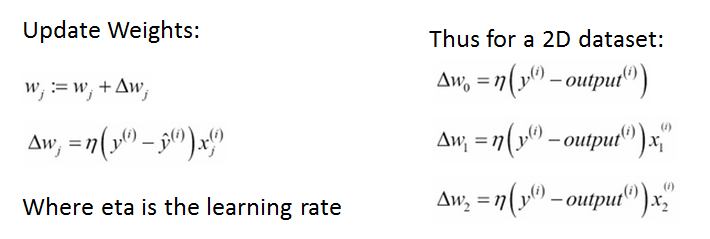

Example: Lets set $\eta$ to 1 for simplicity, and use x1 above.
```
We classifiy it right (neuron didn't fire):
    y = -1; y^ = -1;
    dw = 1(-1 - -1)4 = 1(0)4 =0
    w = 1 + 0 = 1
We classifiy it right (neuron did fire):
    y = 1; y^ = 1;
    dw = 1(1 - 1)4 = 1(0)4 =0
    w = 1 + 0 = 1
We classifiy it wrong (neuron did fire):
    y = -1; y^ = 1;
    dw = 1(-1 - 1)4 = 1(-2)4 =-8
    w = 1 + -8 = -7
We classifiy it wrong (neuron didn't' fire):
    y = 1; y^ = -1;
    dw = 1(1 - -1)4 = 1(2)4 =8
    w = 1 + 8 = 9
```
```
We classifiy it wrong (neuron didn't' fire):
Running through the net input function again with updated weights:
```                       
```
    wT                x                                      z
                    | 1 |    
                    | 4 | 
| -28  9  8  11 | x | 2 | = | -28*1 + 9*4 + 8*2 + 11*3 | = | 57 |
                    | 3 |
```
Our neuron will now fire and classify correctly.  It's important to note how large a swing $\eta$ = 1 gave.  Typically we will want to choose a much smaller learning rate -- 0.1 > $\eta$ > 0.001.

In [47]:
class Perceptron(object):
    """Perceptron classifier.  Going to follow sklearn conventions with fit, predict methods

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    #activation
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])

        for _ in range(self.n_iter):
            for xi, yi in zip(X, y):
                dwi = self.eta * (yi - self.predict(xi))
                self.w_[1:] += dwi * xi
                self.w_[0] += dwi
        return self

### Helper Code

In [44]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

# Training

In [48]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

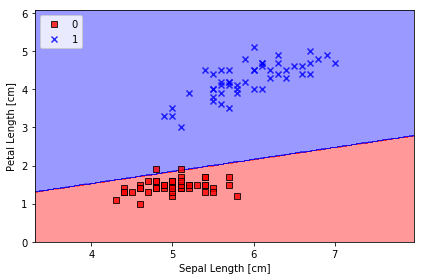

In [50]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Using Scikit Learn

In [36]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, n_iter=10)
ppn.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=10, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

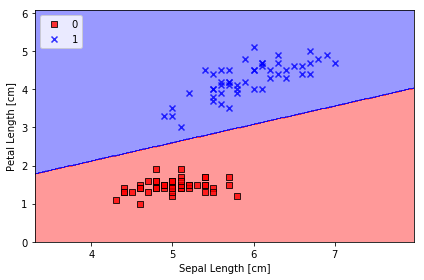

In [37]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Next Steps:

You might think the next steps would be to simply add more layers to create deep networks, but there's alot to improve on the Perceptron first.
- Adding Stochastic Gradient Descent to improve our learning rate.
- Improving our Activation function from a step function to a Sigmoid, Tanh or ReLU function
- Adding One Versus Many algorithms to allow classification of multiple objects.
- Adding Penalties for overfitting to improve generalization.
- Most importantly, figuring out Back Propagation (Calculus!) to train more than one layer back. This ones important!